In [6]:
#Calling all the required libraries required for EDA analysis
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import geoip2.database
import ipaddress

In [2]:
#Creating df dataframe from 'new_df.csv' file containing data from 1st December till 31st of December
df = pd.read_csv('C:/Users/abhie/OneDrive - Northeastern University/ALY6080/Week7/df.csv')

In [3]:
#Define datatypes:
dtypes = {'Event Time': 'datetime64[ns]',
          'Ingest Time': 'datetime64[ns]',
          'Timestamp Request': 'datetime64[ns]',
          'Timestamp Response': 'datetime64[ns]'}

In [4]:
#Convert the 'df' columns to their respective datatypes:
df = df.astype(dtypes)
df.dtypes

Unnamed: 0                     int64
Event Time            datetime64[ns]
Ingest Time           datetime64[ns]
Source IP                     object
HTTP Method                   object
HTTP Url                      object
HTTP Auth                     object
Resource                      object
Organization                  object
Timestamp Request     datetime64[ns]
Timestamp Response    datetime64[ns]
Response_Time                 object
dtype: object

In [7]:
#Dropping 'Response_Time' variable from 'df' dataframe
df.drop(columns = 'Response_Time')
#Crea 'Response_Time' variable from 'df' dataframe
df['Response_Time'] = df['Timestamp Response'] - df['Timestamp Request']

In [8]:
#Removing records from 'df1' dataset which have been created before 1st of December 2022.
df = df[df['Timestamp Request']>=datetime.datetime(2022, 12, 1, 0, 0)]
df = df[df['Timestamp Request']<=datetime.datetime(2023, 1, 1, 0, 0)]

In [20]:
df.head()

,Unnamed: 0,Event Time,Ingest Time,Source IP,HTTP Method,HTTP Url,HTTP Auth,Resource,Organization,Timestamp Request,Timestamp Response,Response_Time
142,148,2022-12-01 00:00:00.451883,2022-12-01 00:00:06.350516900,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,2022-12-01 00:00:00.309729,2022-12-01 00:00:00.451883,0 days 00:00:00.142154
143,149,2022-12-01 00:00:00.930797,2022-12-01 00:00:06.350519100,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,2022-12-01 00:00:00.782563,2022-12-01 00:00:00.930797,0 days 00:00:00.148234
144,150,2022-12-01 00:00:01.213392,2022-12-01 00:00:06.350519400,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,2022-12-01 00:00:01.051775,2022-12-01 00:00:01.213392,0 days 00:00:00.161617
149,155,2022-12-01 00:00:01.723988,2022-12-01 00:00:10.353102100,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,2022-12-01 00:00:01.612861,2022-12-01 00:00:01.723988,0 days 00:00:00.111127
150,156,2022-12-01 00:00:03.657868,2022-12-01 00:00:10.353102400,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,API_KEY 6b50,TaskResource.get,lara.andrade-org,2022-12-01 00:00:03.656532,2022-12-01 00:00:03.657868,0 days 00:00:00.001336


In [21]:
# Calculate the first quartile (Q1) and third quartile (Q3) of 'time_difference'
Q1 = df['Response_Time'].quantile(0.25)
Q3 = df['Response_Time'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lb = Q1 - 1.5 * IQR
ub = Q3 + 1.5 * IQR

# Create a new column 'if_highload'
df['heavy_load'] = df['Response_Time'].apply(lambda x: 1 if x > ub else 0)
print(Q1)
print(Q3)

0 days 00:00:00.084398
0 days 00:00:00.130257


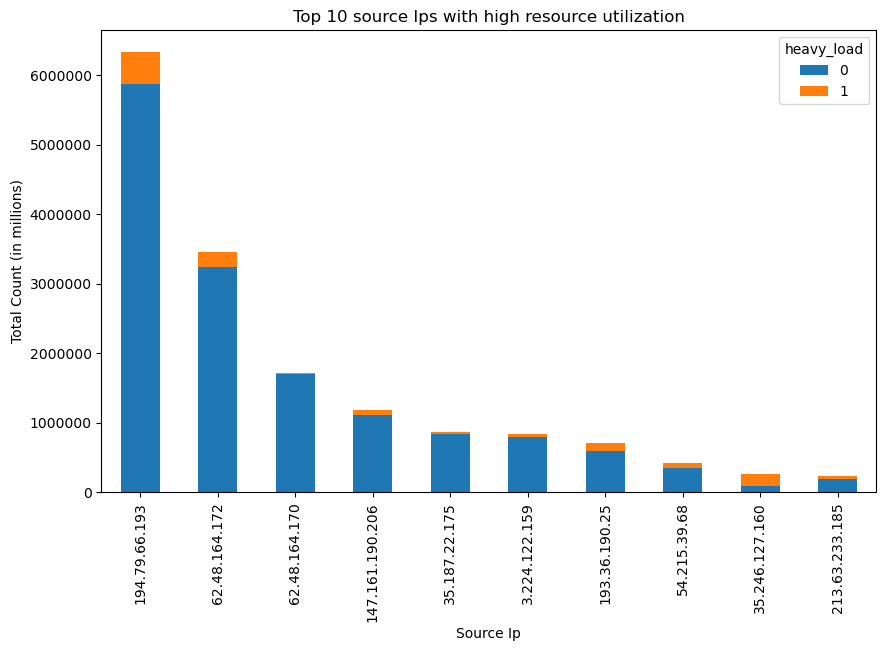

In [41]:
#====================================================Created by Ziqi Zhu==============================================================
#Create 'source_ip_counts' variable using groupby method to count the number of times multiple source Ips which have been using heavy load.
source_ip_counts = df.groupby(['Source IP', 'heavy_load']).size().unstack()
#Select top 10 'sourceIps' values with the highest counts
top10_source_ips = source_ip_counts.sum(axis=1).nlargest(10).index
#Creating 'top10_source_ips_counts' variavble using 'source_ip_counts' to include only the top 10 'sourceIp' values
top10_source_ips_counts = source_ip_counts.loc[top10_source_ips]
#Plotting the stacked bar chart based on heavy_load categories
ax = top10_source_ips_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
#Adding the title of the graph
ax.set_title('Top 10 source Ips with high resource utilization')
#Labeling the x-axis
ax.set_xlabel('Source Ip')
#Labeling the y-axis
ax.set_ylabel('Total Count (in millions)')
#Removing scientific values (Ie6) from y-limit
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
#Displaying the plot
plt.show()

In [ ]:
#deleting the variables to free memory space
del source_ip_counts, top10_source_ips, top10_source_ips_counts

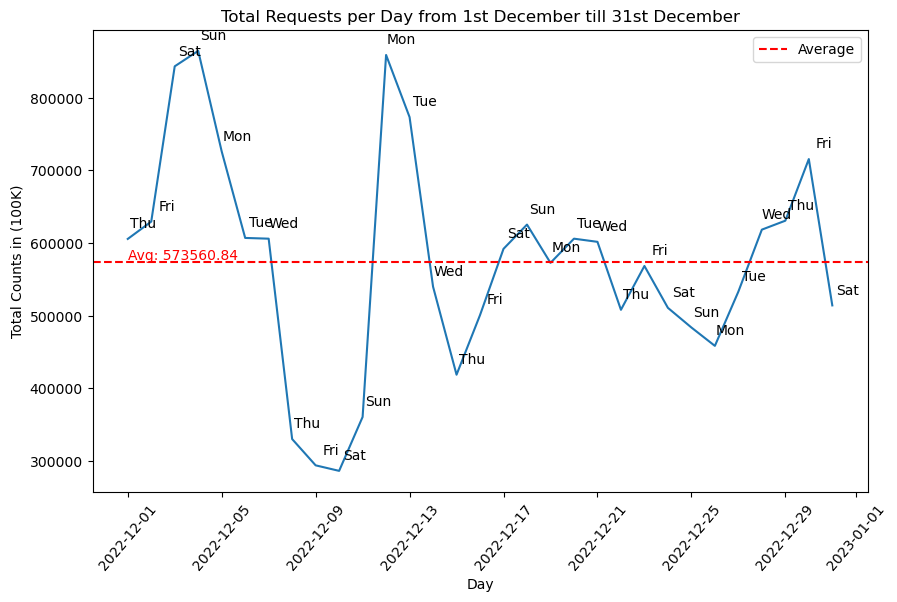

In [45]:
#===============================Created by Rahul Agarwal======================================================
#Creating df_day variable using groupby method to categorize the TimeStamp request column's values with their respective counts
df_day = df.groupby(df['Timestamp Request'].dt.date).size()
#Calculating the average request created in the each day in the month of December 2022.
avg_requests = df_day.mean()
#Creating the 'fig' and axes variable using subplots method.
fig, ax = plt.subplots(figsize=(10, 6))
#Plotting the line chart based on 'df_day' variable
df_day.plot(kind='line', ax=ax)
#Adding average requests line in the line chart plot
ax.axhline(avg_requests, color='red', linestyle='--', label='Average')
#Define custom labels using weekday names associated with each day of the month December 2022.
custom_labels = ['Thu','Fri','Sat','Sun','Mon','Tue','Wed','Thu','Fri','Sat',
                 'Sun','Mon','Tue','Wed','Thu','Fri','Sat','Sun','Mon','Tue',
                 'Wed','Thu','Fri','Sat','Sun','Mon','Tue','Wed','Thu','Fri','Sat']
#Adding the lables on the line chart graph
for i, count in enumerate(df_day.values):
    date = df_day.index[i]
    label = custom_labels[i]
    ax.annotate(label, xy=(date, count), xytext=(11, 11),
                textcoords='offset points', ha='center', va='center')

#Annotate average value on the average line
ax.text(df_day.index[0], avg_requests, f'Avg: {avg_requests:.2f}', color='red',
        verticalalignment='bottom', horizontalalignment='left', fontsize=10)
#Adding x-axis label
plt.xlabel('Day')
#Adding y-axis label
plt.ylabel('Total Counts in (100K)')
#Rotating x-axis with 50 degree
plt.xticks(rotation = 50)
#Adding title of the plot
plt.title('Total Requests per Day from 1st December till 31st December')
#Adding legend
plt.legend()
#Displaying the plot
plt.show()

In [69]:
len(df.loc[df['Timestamp Request']>=datetime.datetime(2022, 12, 31, 0, 0)])

514048

In [48]:
#============================================Created by Fnu Abhishek======================================
#Creating 'timeAndCounts' dictionary to store datetime as its key and number of highest requests observed in a minute on each day as values
timeAndCounts = {}
#Creating for loop to iterating each day of the month of December
for i in range(1,32):
    if i<=30:
        start_time = datetime.datetime(2022, 12, 0+i, 0, 0)# Starting date and time
        end_time = datetime.datetime(2022, 12, 1+i, 0, 0)  # Ending date and time
    else:
        start_time = datetime.datetime(2022, 12, 31, 0, 0)# Starting date and time
        end_time = datetime.datetime(2023,1, 1, 0, 0) 
        
    #Initialize previous time to the starting time
    previous_time = start_time
    #Creating highest_count variable to temporarily store the highest values of request calculated in each day
    highest_count = -10000
    #Creating a t variable with empty value
    t = ''
    #Traverse every minute from the starting time until the ending time
    while previous_time < end_time:
        current_time = previous_time + datetime.timedelta(minutes=1)
        counts = len(df.loc[(df['Timestamp Request'] >= previous_time) & (df['Timestamp Request'] < current_time), 'Timestamp Request'])
        if highest_count < counts:
            highest_count  = counts
            t = previous_time
            # Increment current time by 1 minute
        previous_time += datetime.timedelta(minutes=1)
    #Finally adding the highest count calculated on each day in the 'timeAndCounts' dictionary variable
    timeAndCounts[t] = highest_count
#============================================Created by Fnu Abhishek======================================

In [73]:
#============================================Created by Fnu Abhishek======================================
#Creating t_df dataframe
t_df = pd.DataFrame()
#Iterating to each item available in the timeAndCounts variable
for key, value in timeAndCounts.items():
    # Create a temporary dataframe with a single row
    temp_df = pd.DataFrame({'TimeStamp': [key], 'Count': [value]})
    
    # Append the temporary dataframe to the main t_df dataframe
    t_df = t_df.append(temp_df, ignore_index=True)
#============================================Created by Fnu Abhishek======================================

C:\Users\abhie\AppData\Local\Temp\ipykernel_5548\2310309719.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df = t_df.append(temp_df, ignore_index=True)


In [74]:
#============================================Created by Fnu Abhishek======================================
#Creating a 'Day' column in t_df dataframe which consists of day name based on the TimeStamp column
t_df['Day'] = pd.to_datetime(t_df['TimeStamp']).dt.day_name()
#============================================Created by Fnu Abhishek======================================

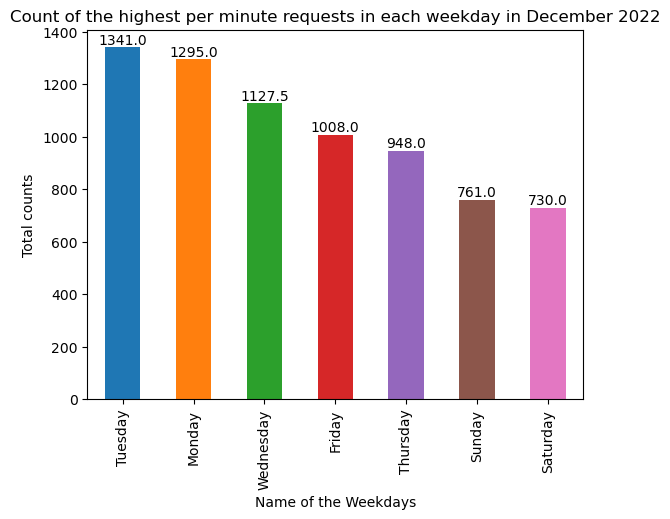

In [87]:
#============================================Created by Fnu Abhishek======================================
#Create a grouped_df dataframe based on the count of requests made on each weekday using the median method. 
grouped_df = t_df.groupby('Day')['Count'].median()
#Sorting the grouped_df values in descending order
grouped_df = grouped_df.sort_values(ascending=False)
#Creating the colors variable consists of 7 different colors
colors = plt.get_cmap('tab10').colors[:7]
#Plotting the stacked bar chart using group_df variable
grouped_df.plot(kind='bar', color = colors, stacked=True)
#Set the x-axis label
plt.xlabel('Name of the Weekdays')
#Set the y-axis label
plt.ylabel('Total counts')
#Adding the title of the plot
plt.title('Count of the highest per minute requests in each weekday in December 2022')
#Adding the labels showing the count on the top of each bar
for i, v in enumerate(grouped_df):
    plt.text(i, v, str(v), ha='center', va='bottom')
#Displaying the plot
plt.show()
#============================================Created by Fnu Abhishek======================================

In [93]:
df.head()

,Unnamed: 0,Event Time,Ingest Time,Source IP,HTTP Method,HTTP Url,HTTP Auth,Resource,Organization,Timestamp Request,Timestamp Response,Response_Time
142,148,2022-12-01 00:00:00.451883,2022-12-01 00:00:06.350516900,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,2022-12-01 00:00:00.309729,2022-12-01 00:00:00.451883,0 days 00:00:00.142154
143,149,2022-12-01 00:00:00.930797,2022-12-01 00:00:06.350519100,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,2022-12-01 00:00:00.782563,2022-12-01 00:00:00.930797,0 days 00:00:00.148234
144,150,2022-12-01 00:00:01.213392,2022-12-01 00:00:06.350519400,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,2022-12-01 00:00:01.051775,2022-12-01 00:00:01.213392,0 days 00:00:00.161617
149,155,2022-12-01 00:00:01.723988,2022-12-01 00:00:10.353102100,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,f00716b5-e120-4699-b827-791d6e2a2565,2022-12-01 00:00:01.612861,2022-12-01 00:00:01.723988,0 days 00:00:00.111127
150,156,2022-12-01 00:00:03.657868,2022-12-01 00:00:10.353102400,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,API_KEY 6b50,TaskResource.get,lara.andrade-org,2022-12-01 00:00:03.656532,2022-12-01 00:00:03.657868,0 days 00:00:00.001336


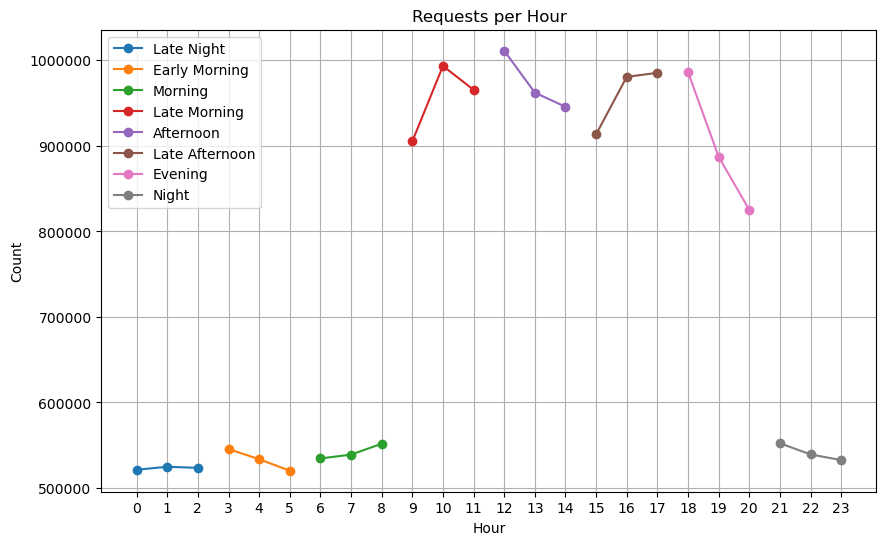

In [95]:
#==============================Created by Rahul Agarwal========================================
#Group data by hour and count the occurrences
df_hour = df.groupby(df['Timestamp Request'].dt.hour).size()
#Define the subgroups with their corresponding time divisions
subgroups = {
    range(0, 3): "Late Night",              # midnight to 3 am
    range(3, 6): "Early Morning",           # 3 am to 6 am
    range(6, 9): "Morning",                 # 6 am to 9 am
    range(9, 12): "Late Morning",           # 9 am to 12 pm
    range(12, 15): "Afternoon",             # 12 pm to 3 pm
    range(15, 18): "Late Afternoon",        # 3 pm to 6 pm
    range(18, 21): "Evening",               # 6 pm to 9 pm
    range(21, 24): "Night"                  # 9 pm to midnight
}
#Plotting data per hour with different colors for subgroups
fig, ax = plt.subplots(figsize=(10, 6))
#Iterating to items of the subgroups dictionary and plotting the line chart
for subgroup_range, subgroup_name in subgroups.items():
    subgroup_data = df_hour.loc[df_hour.index.isin(subgroup_range)]
    ax.plot(subgroup_data.index, subgroup_data.values, marker='o', label=subgroup_name)
#Adding the x-axis label
plt.xlabel('Hour')
#Adding the y-axis label
plt.ylabel('Count')
#Adding the title of the graph
plt.title('Requests per Hour')
#Adding values in the x-axis from 0 to 24 hrs.
plt.xticks(df_hour.index)
#Adding grid lines in the graph
plt.grid(True)
#Removing scientific values (Ie6) from y-limit
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
#Adding legend which shows the categories of requests made in different interval of time
plt.legend(loc = 'upper left')
#Displaying the plot
plt.show()

In [22]:
#======================================Created by Rahul Agarwal=========================================
#Creating time_periods method to categorize the 24 hrs of time in 8 different time periods
def time_periods(hour):
    if 0 <= hour < 3:
        return 'Late Night'
    elif 3 <= hour < 6:
        return 'Early Morning'
    elif 6 <= hour < 9:
        return 'Morning'
    elif 9 <= hour < 12:
        return 'Late Morning'
    elif 12 <= hour < 15:
        return 'Afternoon'
    elif 15 <= hour < 18:
        return 'Late Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
#Creating 'hour' colum in 'df' dataframe
df['hour'] = df['Timestamp Request'].dt.hour
#Apply the custom function to the 'hour' column and create a new 'period' column
df['time_period'] = df['hour'].apply(time_periods)
#=====================================================================================================

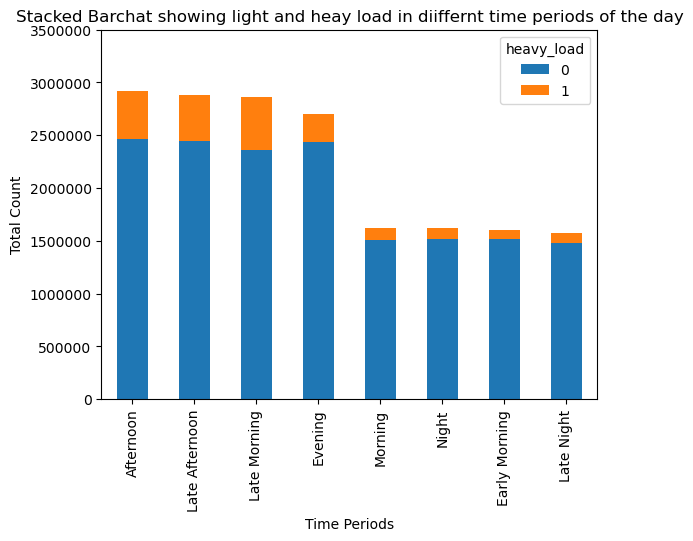

In [111]:
#======================================Created by Fnu Abhishek=========================================
#Count the occurrences of each category and heavy_load combination
total_counts_in_periods = df.groupby(['time_period', 'heavy_load']).size().unstack()
#Sorting the values of total_counts_in_periods variable in the descending order
total_counts_in_periods['Total'] = total_counts_in_periods.sum(axis=1)
total_counts_in_periods = total_counts_in_periods.sort_values('Total', ascending=False)
# Remove the 'Total' column
total_counts_in_periods = total_counts_in_periods.drop('Total', axis=1)
#Create a stacked bar plot
total_counts_in_periods.plot(kind='bar', stacked=True)
# Set the title and labels
plt.title('Stacked Barchart showing light and heay load in diiffernt time periods of the day')
#Adding x-axis label
plt.xlabel('Time Periods')
#Adding y-axis label
plt.ylabel('Total Count')
#Setting up the y-axis limit
plt.ylim(0, 3500000)
#Convert the scientific (Ie6) y-axis values into decimal values
plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
#Displaying the plot
plt.show()
#=========================================================================================================

In [ ]:
#Using Source IP variable creating city and country variable in the given dataframe======(By Ziqi Zhu)
# Function to validate and format IP addresses
def format_ip_address(ip):
    try:
        ip_obj = ipaddress.ip_address(ip)
        return str(ip_obj)
    except ValueError:
        return None

# Apply the formatting function to the 'Source IP' column
df['Source IP'] = df['Source IP'].apply(format_ip_address)

city = []
country = []
latitude = []
longitude = []

reader = geoip2.database.Reader('C:/Users/abhie/OneDrive - Northeastern University/ALY6080/Week7/dbip-location-2023-05.mmdb')

# Iterate over the IP addresses in the "data" dataset
for ip_address in df['Source IP']:
    if ip_address:
        try:
            # Attempt to parse the IP address
            ip = ipaddress.ip_address(ip_address)

            # Retrieve the geolocation information for the IP address
            response = reader.city(ip)

            # Get the city, country, latitude, and longitude information
            city_name = response.city.names.get('en')
            country_name = response.country.names.get('en')
            lat = response.location.latitude
            lon = response.location.longitude

            # Append the information to the respective lists
            city.append(city_name)
            country.append(country_name)
            latitude.append(lat)
            longitude.append(lon)

        except (geoip2.errors.AddressNotFoundError, ValueError):
            # IP address not found in the database or invalid IP address
            city.append('Not Found')
            country.append('Not Found')
            latitude.append(None)
            longitude.append(None)

    else:
        # No IP address provided
        city.append('Not Found')
        country.append('Not Found')
        latitude.append(None)
        longitude.append(None)

# Close the reader object
reader.close()

df['city'] = city
df['country'] = country
df['latitude'] = latitude
df['longitude'] = longitude
#==========================================================================================================

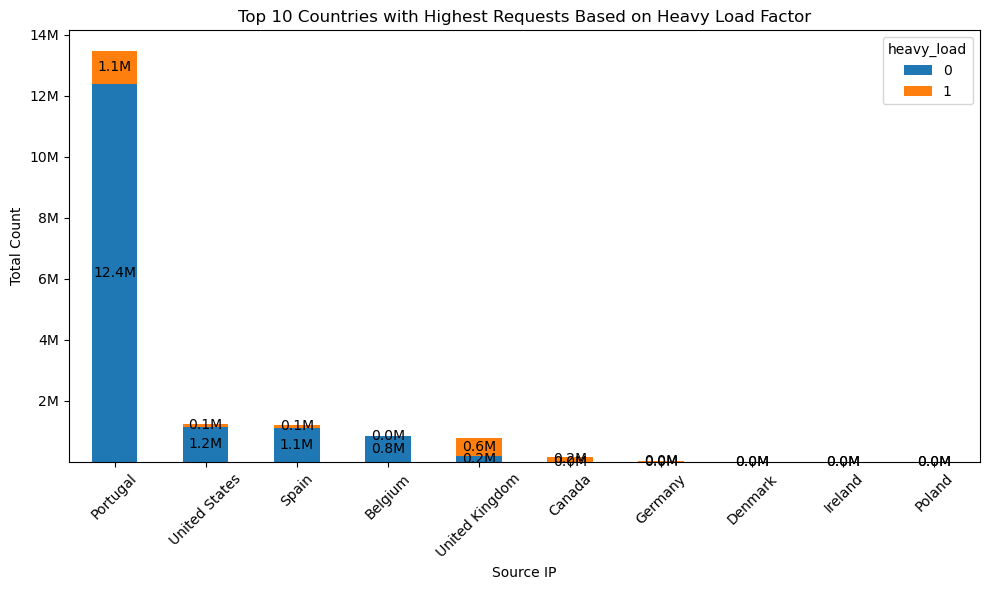

In [5]:
#===============================Created by Ziqi Zhu=====================================================
#Create 'Countries' variable to calulate the requests created by countries based on load factor
Countries = df.groupby(['country', 'heavy_load']).size().unstack()

# Select the top 10 'countries' values with the highest counts
top10_Countries = Countries.sum(axis=1).nlargest(10).index

# Create 'countries' variable using 'top10_Countries' to include only the top 10 'counties' values
top10_Countries_counts = Countries.loc[top10_Countries]

# Plotting the stacked bar chart based on heavy_load categories
ax = top10_Countries_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set the title of the graph
ax.set_title('Top 10 Countries with Highest Requests Based on Heavy Load Factor')

# Label the x-axis
ax.set_xlabel('Source IP')

# Label the y-axis
ax.set_ylabel('Total Count')

# Format y-axis tick labels to display values in millions
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45)

# Add labels to each bar
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{height/1e6:.1f}M', (x + width/2, y + height/2), ha='center', va='center')
# Display the plot
plt.tight_layout()
plt.show()
#===========================================================================================================

In [ ]:
final_df = df[['Source IP', 'HTTP Method', 'HTTP Auth', 'Resource', 'Organization','heavy_load','time_period']]

In [8]:
columns = {'Event Time':'EventTime','Ingest Time':'IngestTime','Source IP':'SourceIP', 'HTTP Method': 'HTTPMethod','HTTP Url': 'HTTPUrl', 'time_period':'TimePeriod',
           'HTTP Auth': 'HTTPAuth','hour':'Hour','heavy_load':'LoadFactor','city':'City','country':'Country',
           'hour': 'Hour', 'continent':'Continent', 'latitude':'Latitude', 'longitude':'Longitude','Timestamp Request':'TimestampRequest','Timestamp Response':'TimestampResponse'}
df = df.rename(columns=columns)

In [ ]:
#Writing the final dataframe into csv file=========================(By Fnu Abhishek)
df.to_csv('C:/Users/abhie/OneDrive - Northeastern University/ALY6080/Week7/df_new.csv', index=False)
#==================================================================================================

In [ ]:
df.head()

In [ ]:
#==================================Creating a dictionary variable which stores the highest per minute count of each day========
#========Fnu Abhishek=============
timeAndCounts = {}
#Creating for loop to iterating each day of the month of December
for i in range(1,32):
    if i<=30:
        start_time = datetime.datetime(2022, 12, 0+i, 0, 0)# Starting date and time
        end_time = datetime.datetime(2022, 12, 1+i, 0, 0)  # Ending date and time
    else:
        start_time = datetime.datetime(2022, 12, 31, 0, 0)# Starting date and time
        end_time = datetime.datetime(2023,1, 1, 0, 0) 
        
    #Initialize previous time to the starting time
    previous_time = start_time
    #Traverse every minute from the starting time until the ending time
    while previous_time < end_time:
        current_time = previous_time + datetime.timedelta(minutes=1)
        counts = len(df.loc[(df['TimestampRequest'] >= previous_time) & (df['TimestampRequest'] < current_time), 'TimestampRequest'])
        day = current_time.day
        hour = current_time.hour
        key = str(day) +':' +str(hour)
        if timeAndCounts.get(key,0)==0 or timeAndCounts[key] < counts:
            timeAndCounts[key] = counts
           
             # Increment current time by 1 minute
        previous_time += datetime.timedelta(minutes=1)

In [10]:
#Creating t_df dataframe
t_df = pd.DataFrame()
#Iterating to each item available in the timeAndCounts variable
for key, value in timeAndCounts.items():
    # Create a temporary dataframe with a single row
    temp_df = pd.DataFrame({'TimeStamp': [key], 'Count': [value]})
    
    # Append the temporary dataframe to the main t_df dataframe
    t_df = t_df.append(temp_df, ignore_index=True)

C:\Users\abhie\AppData\Local\Temp\ipykernel_22996\1494505206.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df = t_df.append(temp_df, ignore_index=True)


In [12]:
#======================Creating train/test data for predictive analysis================================(Fnu Abhishek)
#Splitting TimeStamp column into Day and Hours
t_df[['Day', 'Hour']] = t_df['TimeStamp'].str.split(':', expand=True)

# Converting Day and Hours columns to numeric type
t_df['Day'] = pd.to_numeric(df['Day'])
t_df['Hour'] = pd.to_numeric(df['Hour'])

del t_df['Unnamed: 0']

t_df.to_csv('hourly_basis_Count.csv')

In [11]:
df['LoadFactors'] = df['LoadFactor']

In [12]:
#======================Creating train/test data for predictive analysis================================(Fnu Abhishek)
from sklearn.model_selection import train_test_split
X = df.drop('LoadFactors', axis=1)
y = df['LoadFactors']

# Perform stratified sampling using train_test_split from scikit-learn
# Specify the test_size and random_state parameters as per your requirements
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
#======================Creating train/test data for predictive analysis================================(Fnu Abhishek)
X_test.to_csv('final_train_test_data.csv')

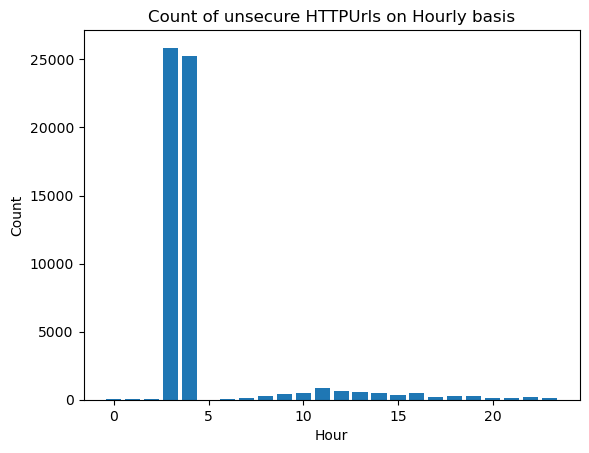

In [19]:
#=====================Frequency of unauthorized HTTP URLs=============================================(By Fnu Abhishek)
import matplotlib.pyplot as plt

# Count occurrences of HTTPUrl for each hour
counts = {}
for hour in sdf['Hour']:
    counts[hour] = counts.get(hour, 0) + 1

# Extract hour and count data for plotting
hours = list(counts.keys())
count_values = list(counts.values())
# Create bar chart
plt.bar(hours, count_values)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count of unsecure HTTPUrls on Hourly basis')
plt.show()